# カラーマップ

#### このコードは，本研究で使用したカラーマップを生成するものである．
#### 本論文では，２量子ビットのQSVMを使用しているため，「カラーマップ」は１６個の係数によるカラーマップから構成される．
#### 詳細は論文を参照されたい．

## ライブラリの取得

In [8]:
import numpy as np
import math
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

## 量子状態，演算子の導入

#### 初期状態，パウリゲート，CNOTゲート，アダマールゲートを定義する．

In [9]:
C_S = np.array([[1], [0], [0], [0]]) #初期状態

#パウリゲート
I = np.array([[1, 0], [0, 1]])
X = np.array([[0,1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])

#CNOTゲート
CNOT = np.array([[1,0,0,0],
                 [0,1,0,0],
                 [0,0,0,1],
                 [0,0,1,0]])

#アダマールゲート，及びアダアールゲート二つのテンソル積
H = 1 / math.sqrt(2) * np.array([[1,1],
                                 [1,-1]])
H_2 = np.kron(H,H)



## パウリ行列の取得

#### 本研究では，２量子ビットのQSVMを仮定しているので，２つのパウリ行列の組合せ16個を定義する．

In [10]:
lis = [I, X, Y, Z]
pair = []
pair = list([[I, I], [I, X], [I, Y], [I, Z],
          [X, I], [X, X], [X, Y], [X, Z],
          [Y, I], [Y, X], [Y, Y], [Y, Z],
          [Z, I], [Z, X], [Z, Y], [Z, Z]])

## 係数$a_i$を取得

#### ここでは，初期エンコード回路，初期エンコード関数によってられる係数を取得する．
#### （このエンコード回路とエンコード関数は関数func内で自由に変更可能である）

In [11]:
def func(x1, x2, i): #　関数の定義(x1及びx2はサンプルの持つ特徴量，iは取得したい係数に対応するパウリ行列)
    
    x12 = (np.pi - x1) * (np.pi - x2) #　エンコード回路においてCNOTゲートに挟まれる位相ゲートの持つ位相


    #　エンコード回路において，最初に２つのビットそれぞれに作用される位相ゲート
    
    #　Rxゲート
    #U1 = np.array([[np.cos(x1/2), -1j*np.sin(x1/2)],
    #               [-1j*np.sin(x1/2), np.cos(x1/2)]])
    #U2 = np.array([[np.cos(x2/2), -1j*np.sin(x2/2)],
    #               [-1j*np.sin(x2/2), np.cos(x2/2)]])
    
    #　Ryゲート
    #U1 = np.array([[np.cos(x1/2), -np.sin(x1/2)],
    #               [np.sin(x1/2), np.cos(x1/2)]])
    #U2 = np.array([[np.cos(x2/2), -np.sin(x2/2)],
    #               [np.sin(x2/2), np.cos(x2/2)]])
    
    #　Rzゲート
    U1 = np.array([[1, 0],
                   [0, np.cos(x1)+1j*np.sin(x1)]])
    U2 = np.array([[1, 0],
                   [0, np.cos(x2)+1j*np.sin(x2)]])
    
    
    U_2 = np.kron(U1, U2)
    

    #　エンコード回路において，CNOTゲートに挟まれる位相ゲート
    
    #　Rxゲート
    #U12 = np.kron(np.array([[1,0], [0,1]]), np.array([[np.cos(x12/2), -1j*np.sin(x12/2)], [-1j*np.sin(x12/2), np.cos(x12/2)]]))
    
    #　Ryゲート
    #U12 = np.kron(np.array([[1,0], [0,1]]), np.array([[np.cos(x12/2), -np.sin(x12/2)], [np.sin(x12/2), np.cos(x12/2)]]))
    
    #　Rzゲート
    U12 = np.kron(np.array([[1,0], [0,1]]), np.array([[1,0],[0,np.cos(x12) + 1j*np.sin(x12)]]))
    
    
    #　エンコード処理
    
    F_1 = np.matmul(CNOT, np.matmul(U12, np.matmul(CNOT, np.matmul(U_2, H_2))))
    F_2 = np.matmul(F_1, F_1)
    C = np.matmul(F_2, C_S)
    C_H = np.conjugate(C.T)
    C_F = np.matmul(C, C_H)
    
    #　係数の取得
    
    A = np.trace(np.matmul(C_F, np.kron(i[0], i[1])))/4
    
    return A

## カラーマップの表示

#### 上の関数により得られる１６個のパウリ行列に対応する係数を一つにまとめて表現する．

C:\Users\karub\AppData\Roaming\Python\Python37\site-packages\numpy\ma\core.py:2795: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


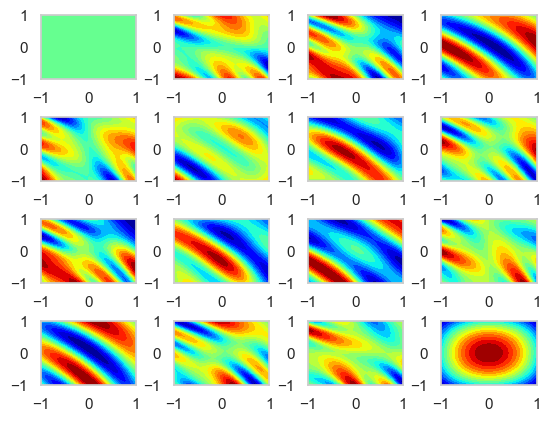

In [19]:
plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('gray')


np.random.seed(2020)
fig = plt.figure()

for idx, p in enumerate(pair):
    
    a = np.linspace(-1, 1, 50)
    b = np.linspace(-1, 1, 50)
    A, B = np.meshgrid(a, b)
    
    C = []
    for i in range(50):
        for j in range(50):
            c = func(A[i][j], B[i][j], p)
            C.append(c)
    

    C = np.array(C).reshape(50, 50)
    
    
    ax1 = fig.add_subplot(4, 4, idx+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.6)
    
    ax1.contourf(A, B, C, 20, cmap="jet")
    

plt.show()

## 検証

#### 上で求めた１６個のカラーマップを重ねる

C:\Users\karub\AppData\Roaming\Python\Python37\site-packages\numpy\ma\core.py:2795: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


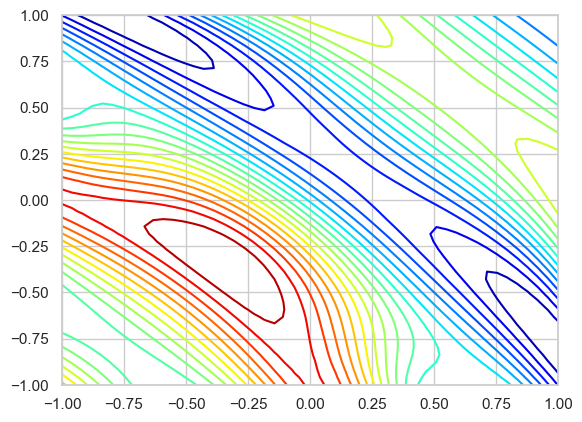

In [20]:
plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('gray')


C_all = 0
np.random.seed(2018)

for idx, p in enumerate(pair):
    
    a = np.linspace(-1, 1, 50)
    b = np.linspace(-1, 1, 50)
    A, B = np.meshgrid(a, b)
    C = []
    for i in range(50):
        for j in range(50):
            c = func(A[i][j], B[i][j], p)
            C.append(c)
    
    C = np.array(C).reshape(50, 50)
    
    C_all = C_all + C
    
    
    
C_all = C_all / 16
    

    
plt.contour(A, B, C_all, 20, cmap="jet")
    


plt.show()